In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import UGate
from qiskit.quantum_info import DensityMatrix
from noisy_quantum_teleportation_benchmarking.averages import to_bloch
from noisy_quantum_teleportation_benchmarking.sampler import PauliSampler, HaarMeasureSampler

In [2]:
def plot_bloch_sphere(bloch_vectors):
    """ Helper function to plot vectors on a sphere."""
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )



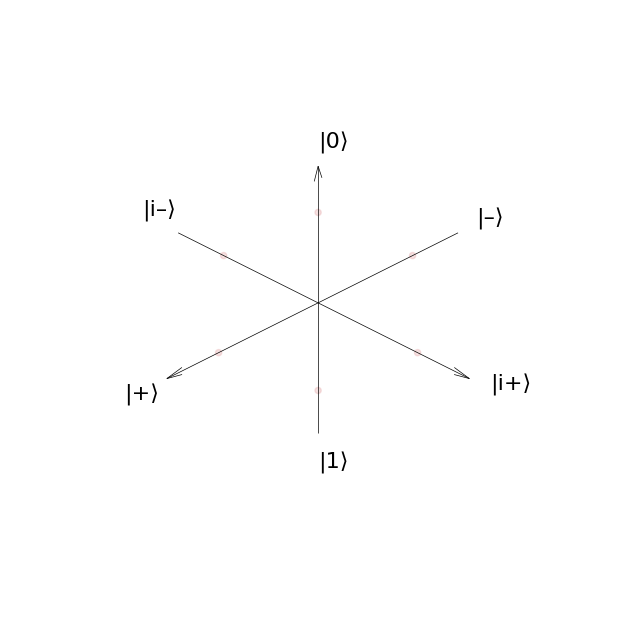

In [3]:
plot_bloch_sphere( np.array([to_bloch(x) for x in PauliSampler().get_samples()]))

In [4]:
def to_bloch2(rho: DensityMatrix):
    return np.array(
        [
            (rho.data[1, 0] + rho.data[0, 1]).real,
            (rho.data[1, 0] - rho.data[0, 1]).imag,
            (rho.data[0, 0] - rho.data[1, 1]).real,
        ]
    )

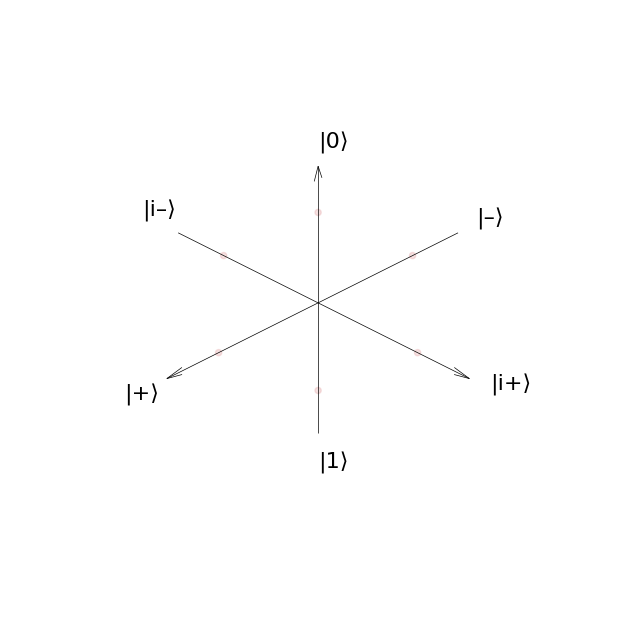

In [5]:
plot_bloch_sphere( np.array([to_bloch2(DensityMatrix.from_label("0").evolve(UGate(a, b, c)).to_operator()) for a, b, c in PauliSampler().get_samples()]))

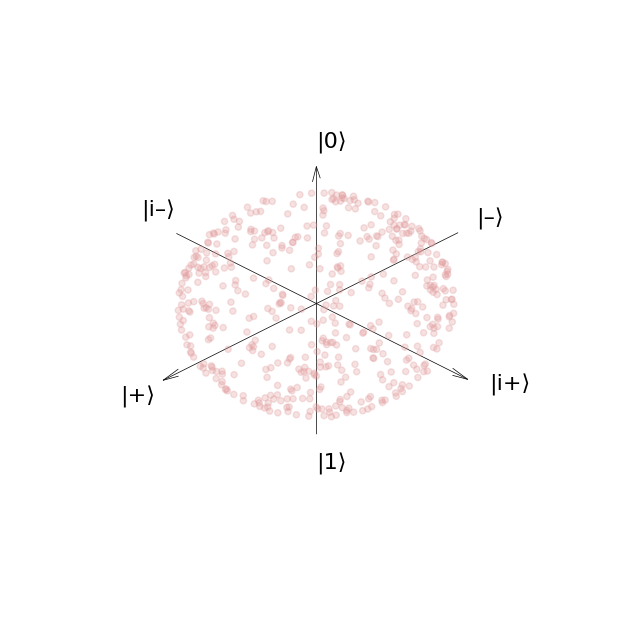

In [6]:
plot_bloch_sphere( np.array([to_bloch(x) for x in HaarMeasureSampler(500).get_samples()]))

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter, ParameterVector

qc = QuantumCircuit(2)
theta = Parameter('theta')
qc.cry(theta, 1, 0)
qc.cx(0, 1)

from qiskit_symb.quantum_info import Operator

op = Operator(qc)
op.subs({theta: '2*acos(sqrt(p))'}).to_sympy()

Matrix([
[1.0,   0,               0,                0],
[  0,   0, 1.0*sqrt(1 - p),      1.0*sqrt(p)],
[  0,   0,     1.0*sqrt(p), -1.0*sqrt(1 - p)],
[  0, 1.0,               0,                0]])

In [8]:
def print_mathematica(vec):
    a, b, c = vec
    return '{'+ str(a) +','+ str(b) +','+ str(c) + '}'

In [9]:
'{'+','.join(print_mathematica(to_bloch(x)) for x in HaarMeasureSampler(500).get_samples())+ '}'

'{{0.353516271529934,-0.7720662727503643,-0.5281476273211251},{0.6267635751569172,-0.7378555732521112,-0.25047270086242523},{-0.546357627881174,-0.7671590286767176,-0.3360957708389857},{0.9436348546270621,-0.24541332280597278,0.2220935886564378},{0.7118992534733646,-0.7013499982467923,0.03616120660722838},{0.8967702801705351,-0.4263923344092557,0.11829049733552303},{0.9179521961390432,-0.22349528427921408,-0.32774017682984885},{-0.7897233354963307,-0.3914968770049923,0.47229995624379195},{0.7361443330915172,0.3389737370828533,-0.5858227773186443},{-0.6083497695078045,0.5606270149082898,0.5617899145542053},{-0.2827254796373267,-0.9580422290382122,-0.04713162996690738},{-0.17819712541365895,-0.9839780947337164,-0.0057352923651819996},{-0.8370001333772348,0.2933136557066681,0.46195007966497986},{0.9147375436447992,-0.3720773577247765,0.15752354146357803},{0.36722105771291214,-0.9275035254222741,0.0698992496487835},{-0.979763586955691,-0.0027795645465958,-0.20013892099401723},{0.8077930526